
# Advertisement Click Prediction

There are many factors impacting whether a user will click on an advertisement or not. Forecasting users' behavior in advance can help a company improve promotion stragegies and increase click through rate (CTR) in the long run. Machine learning models for classification will be used to predict whether or not a consumer will click on an advertisement based off the demographic information and user behavior. 

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Data Information

In [70]:
ad_data=pd.read_csv('advertising.csv')

In [71]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**From the analysis above, we can know:**

**1. There are some category features, which need to be one-hot encoded. We will perform related manipulation in the feature engineering part later**

**2. Timestamp cannot be input to a ML model directly. In the feature engineering part, we need to sepetate timestamp into different new features**

## Exploratory Data Analysis



[Text(0.5, 1.0, 'Daily Internet Usage')]

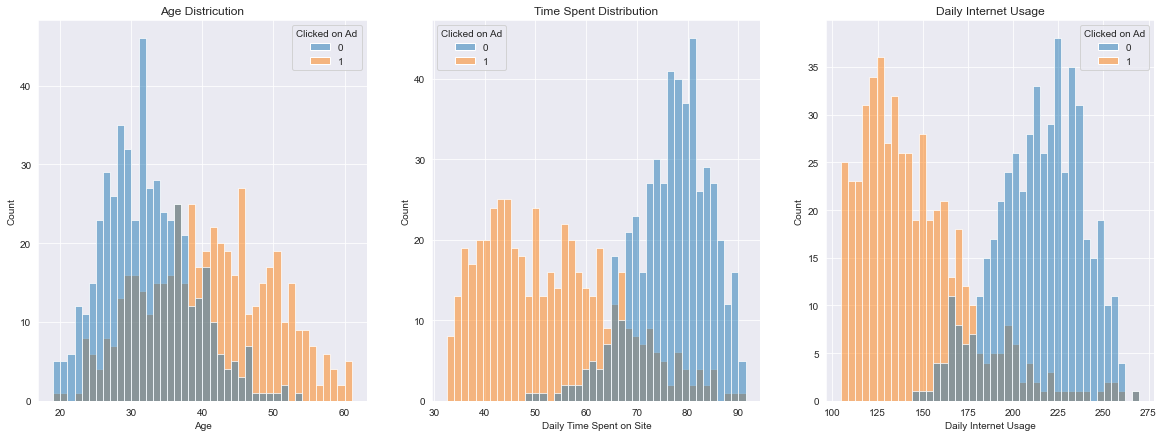

In [120]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,7))

age=sns.histplot(x=ad_data['Age'],hue=ad_data['Clicked on Ad'] ,bins=42, ax=ax1)
age.set(title='Age Districution')
time_spent=sns.histplot(x=ad_data['Daily Time Spent on Site'],hue=ad_data['Clicked on Ad'], bins=42, ax=ax2)
time_spent.set(title='Time Spent Distribution')
Internet_Usage=sns.histplot(x=ad_data['Daily Internet Usage'],hue=ad_data['Clicked on Ad'], bins=42, ax=ax3)
Internet_Usage.set(title='Daily Internet Usage')

**Create a jointplot showing Area Income versus Age.**

Text(0.5, 0.98, 'kernel density function of daily time spent on site according to Age')

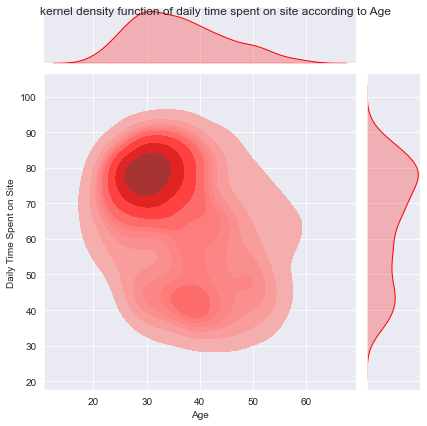

In [131]:
kde=sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',fill=True,color='red')
kde.fig.suptitle('kernel density function of daily time spent on site according to Age')

**From the density plot, we can see most users spent around 70-80 minuites on the site, and most of tem are from 25-35 years old.**

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

Text(0.5, 0.98, 'Hex plot of daily internet usage vs daily time spent on site')

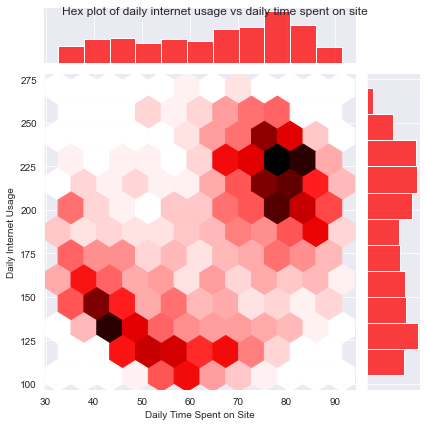

In [134]:
hex_plot=sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='red',kind='hex')
hex_plot.fig.suptitle('Hex plot of daily internet usage vs daily time spent on site')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

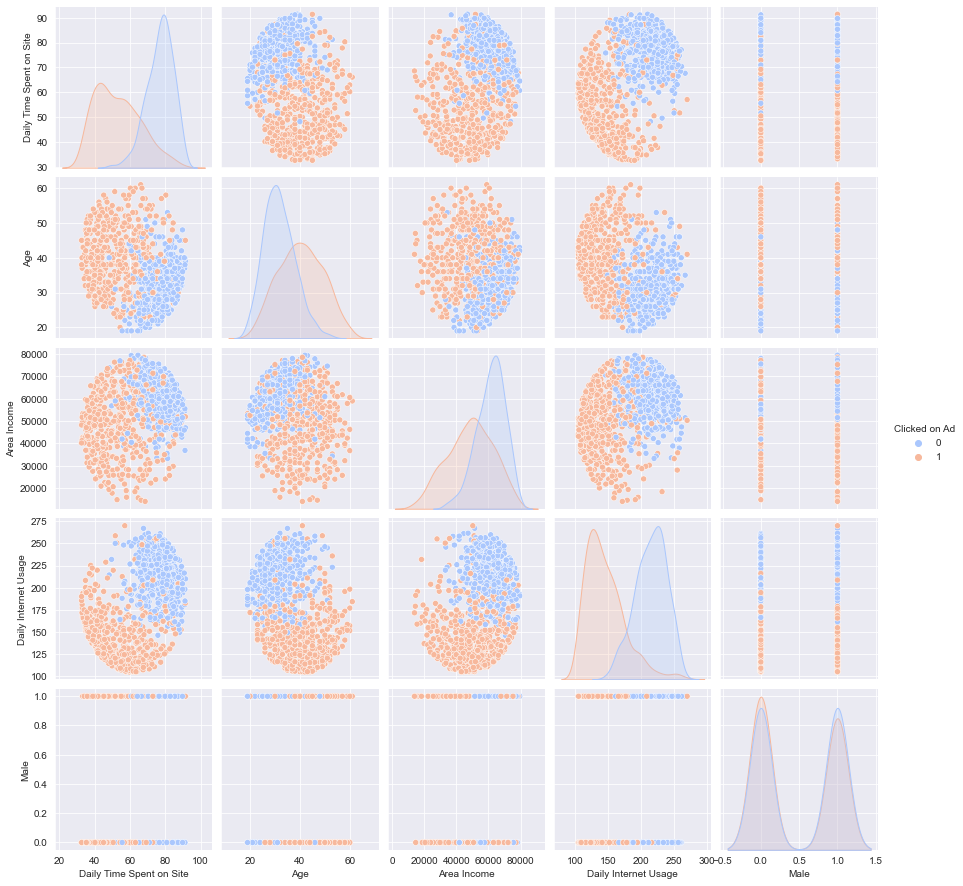

In [42]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='coolwarm')

# Feature Engineering

## Create Dummy Varaibles

In [72]:
country_dummies=pd.get_dummies(ad_data['Country'],drop_first=True)
city_dummies=pd.get_dummies(ad_data['City'],drop_first=True)

new_data=pd.concat([ad_data,country_dummies,city_dummies],axis=1)
new_data.drop(['Country','City','Ad Topic Line'],axis=1,inplace=True)

## Time Features

In [77]:
new_data['month']=pd.to_datetime(new_data['Timestamp']).dt.month
new_data['date']=pd.to_datetime(new_data['Timestamp']).dt.day
new_data['hour']=pd.to_datetime(new_data['Timestamp']).dt.hour
new_data['dayofweek']=pd.to_datetime(new_data['Timestamp']).dt.dayofweek
new_data.drop('Timestamp',axis=1,inplace=True)

# Model Building

## Train Test Split

In [80]:
X=new_data.drop('Clicked on Ad',axis=1)
y=new_data['Clicked on Ad']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

## Model Training

In [82]:
# Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Evaluations

In [135]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [136]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       160
           1       0.93      0.85      0.89       170

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



# Predict the probability of clicking on the ad of each user

In [137]:
logmodel.predict_proba(X_test)

array([[4.32986867e-03, 9.95670131e-01],
       [5.59802965e-02, 9.44019704e-01],
       [9.64861495e-01, 3.51385054e-02],
       [9.23064004e-01, 7.69359963e-02],
       [7.99678221e-01, 2.00321779e-01],
       [7.49943306e-03, 9.92500567e-01],
       [9.48973158e-01, 5.10268421e-02],
       [8.79351052e-01, 1.20648948e-01],
       [9.11811092e-01, 8.81889083e-02],
       [9.74173057e-01, 2.58269434e-02],
       [9.87977059e-01, 1.20229408e-02],
       [1.64334008e-01, 8.35665992e-01],
       [1.08762934e-01, 8.91237066e-01],
       [4.01507501e-01, 5.98492499e-01],
       [9.82870038e-01, 1.71299620e-02],
       [9.70954150e-01, 2.90458496e-02],
       [7.10364763e-03, 9.92896352e-01],
       [9.51000858e-01, 4.89991423e-02],
       [7.95632151e-01, 2.04367849e-01],
       [9.84950592e-01, 1.50494078e-02],
       [5.43542379e-02, 9.45645762e-01],
       [9.26398129e-01, 7.36018706e-02],
       [3.35938764e-01, 6.64061236e-01],
       [4.08854868e-02, 9.59114513e-01],
       [9.825450